In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler_x = StandardScaler()

In [5]:
X = scaler_x.fit_transform(x)

In [6]:
scaler_y = StandardScaler()

In [7]:
Y = scaler_y.fit_transform(y)

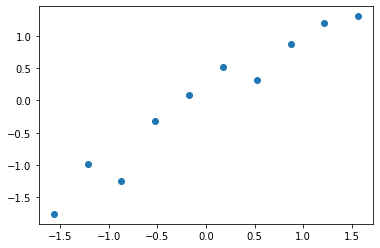

In [8]:
%matplotlib inline
plt.scatter(X,Y)

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.Dense(units=1, activation='linear', input_shape=(X.shape[1], )))

In [11]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001),loss='mse')

In [12]:
hist  = model.fit(X,Y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 454ms/step - loss: 3.4481
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.4346
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.4211
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.4076
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.3942
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.3809
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.3676
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.3544
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.3412
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.3281
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.3150
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.3020
Epoch 13/1000
1/1 [============================

In [13]:
def plot_hist_and_line(history, x, y, model):
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'])
    plt.xlabel('epochs')
    plt.ylabel('loss')

    plt.subplot(1, 2, 2)
    x_test = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_test)
    plt.scatter(x, y)
    plt.plot(x_test, y_pred, color='green')
    plt.xlabel('x')
    plt.ylabel('y')

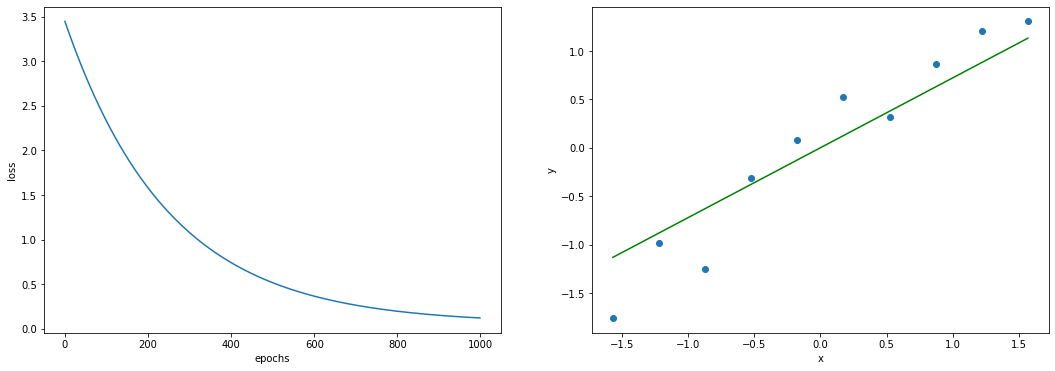

In [14]:
plot_hist_and_line(hist.history, X,Y,model)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regression = LinearRegression()

In [17]:
regression.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(regression.coef_, regression.intercept_)

[[0.97119127]] [3.31147861e-16]


In [19]:
print(model.get_weights())

[array([[0.7224632]], dtype=float32), array([-7.95438e-09], dtype=float32)]


In [20]:
mod = tf.keras.models.Sequential()

In [21]:
mod.add(tf.keras.layers.Dense(units=1, activation='linear', input_shape=(X.shape[1], )))

In [22]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [23]:
mod.compile(loss='mse', optimizer= opt, metrics=['mse'])

In [24]:
h = model.fit(X,Y, epochs=1000, validation_split=0.2, verbose=0)

In [25]:
import pandas as pd

In [26]:
hh = pd.DataFrame(h.history)

In [27]:
hh['epoch'] = h.epoch

In [28]:
hh.tail()

,loss,val_loss,epoch
995,0.066778,0.018534,995
996,0.066766,0.018566,996
997,0.066753,0.018597,997
998,0.066740,0.018628,998
999,0.066728,0.018659,999


In [29]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [30]:
new_hist = mod.fit(X,Y, epochs=1000, validation_split=0.2, verbose=0, callbacks=[early_stop])

In [31]:
print(mod.get_weights())

[array([[0.42546198]], dtype=float32), array([-0.26023906], dtype=float32)]
